<a href="https://colab.research.google.com/github/arumm25/Repo1-PenambanganData/blob/main/Repository8_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_excel('/content/drive/MyDrive/Penambangan Data/produksiPadi.xlsx')
data.head()

,Tahun,Produksi Padi(Ton),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1970,18693649.0,NaN,NaN,NaN,NaN
1,1971,20483687.0,NaN,NaN,NaN,NaN
2,1972,19393933.0,NaN,NaN,Ubah data tersebut secara lagging,NaN
3,1973,21490578.0,NaN,NaN,NaN,NaN
4,1974,22476073.0,NaN,NaN,Lakukan Split Ratio --> 70 : 30,NaN


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tahun               53 non-null     int64  
 1   Produksi Padi(Ton)  53 non-null     float64
 2   Unnamed: 2          0 non-null      float64
 3   Unnamed: 3          0 non-null      float64
 4   Unnamed: 4          7 non-null      object 
 5   Unnamed: 5          2 non-null      object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.6+ KB


,Tahun,Produksi Padi(Ton),Unnamed: 2,Unnamed: 3
count,53.000000,5.300000e+01,0.0,0.0
mean,1996.000000,4.694139e+07,NaN,NaN
std,15.443445,1.632983e+07,NaN,NaN
min,1970.000000,1.869365e+07,NaN,NaN
25%,1983.000000,3.530311e+07,NaN,NaN
50%,1996.000000,4.937705e+07,NaN,NaN
75%,2009.000000,5.460403e+07,NaN,NaN
max,2022.000000,8.114862e+07,NaN,NaN


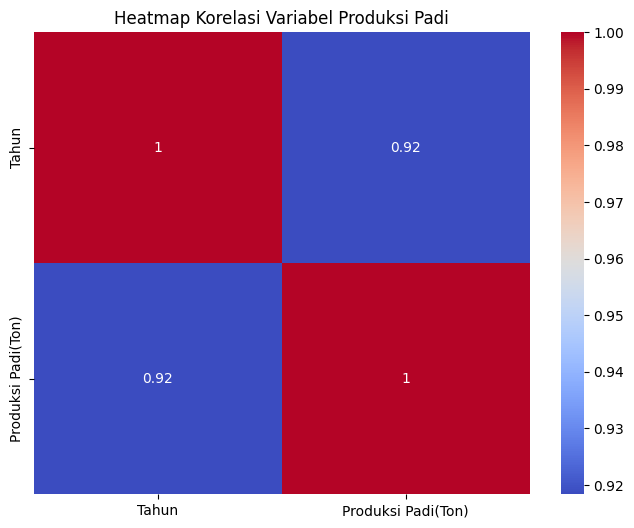

In [6]:
data_numeric = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], errors='ignore')
corr = data_numeric.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel Produksi Padi')
plt.show()

In [8]:
X = data[['Tahun']]
y = data['Produksi Padi(Ton)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

y_pred = model_simple.predict(X_test)

In [9]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 52964617030888.55
R2 Score: 0.847194482876485


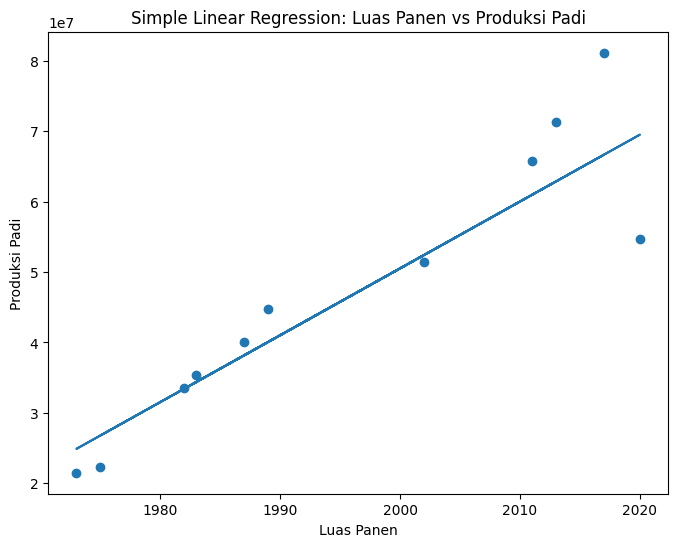

In [13]:
# Visualisasi scatter dan garis regresi
plt.figure(figsize=(8,6))

# Scatter data aktual
plt.scatter(X_test, y_test)

# Garis regresi (prediksi)
plt.plot(X_test, y_pred)

plt.xlabel('Luas Panen')
plt.ylabel('Produksi Padi')
plt.title('Simple Linear Regression: Luas Panen vs Produksi Padi')
plt.show()

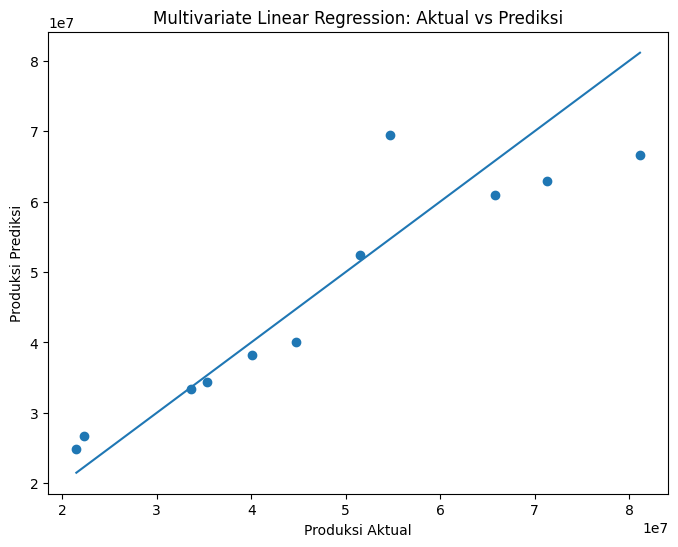

In [14]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred)
plt.xlabel('Produksi Aktual')
plt.ylabel('Produksi Prediksi')
plt.title('Multivariate Linear Regression: Aktual vs Prediksi')

# Garis ideal (y = x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

plt.show()

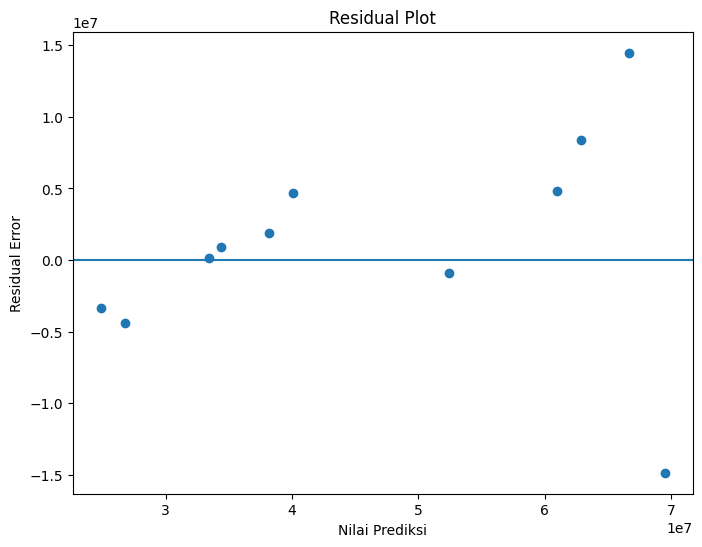

In [15]:
residual = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residual)
plt.axhline(y=0)

plt.xlabel('Nilai Prediksi')
plt.ylabel('Residual Error')
plt.title('Residual Plot')
plt.show()

Visualisasi Scatter Data Asli

(Luas Panen vs Produksi Padi)

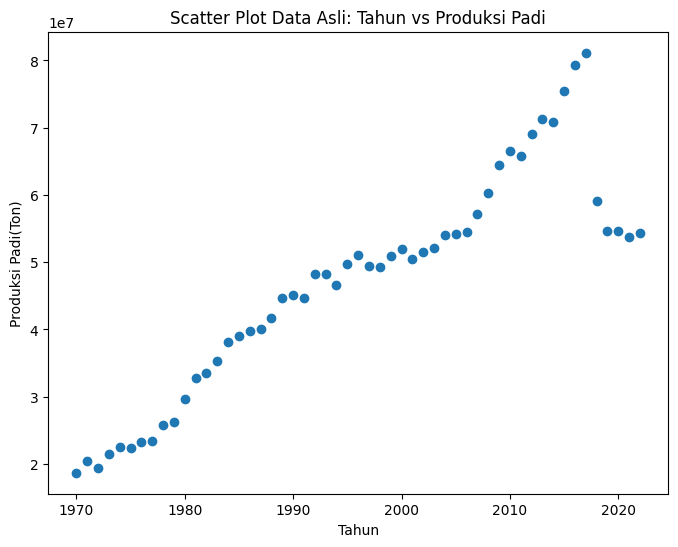

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(data['Tahun'], data['Produksi Padi(Ton)'])
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi(Ton)')
plt.title('Scatter Plot Data Asli: Tahun vs Produksi Padi')
plt.show()

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
